In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
dataset=pd.read_csv("Churn_Modelling.csv")
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [8]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
#creating dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)
print(geography)
print(gender)

      Germany  Spain
0       False  False
1       False   True
2       False  False
3       False  False
4       False   True
...       ...    ...
9995    False  False
9996    False  False
9997    False  False
9998     True  False
9999    False  False

[10000 rows x 2 columns]
       Male
0     False
1     False
2     False
3     False
4     False
...     ...
9995   True
9996   True
9997  False
9998   True
9999  False

[10000 rows x 1 columns]


In [13]:
X=pd.concat([X,geography,gender],axis=1)
X=X.drop(["Geography","Gender"],axis=1)

In [14]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [16]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [17]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [45]:
#initializing the ann
classifier=Sequential()

#adding the input layer and the first hiiden layer
classifier.add(Dense(units=10,kernel_initializer="he_normal",activation="relu",input_dim=11))
classifier.add(Dropout(0.3))

#adding the second hiiden layer
classifier.add(Dense(units=20,kernel_initializer="he_normal",activation="relu"))
classifier.add(Dropout(0.4))

#adding the third hiiden layer
classifier.add(Dense(units=15,kernel_initializer="he_normal",activation="relu"))
classifier.add(Dropout(0.2))

#adding the output layer
classifier.add(Dense(units=1,kernel_initializer="glorot_uniform",activation="sigmoid"))

#compiling the ann model
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

#classifier summary
classifier.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 10)                120       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_24 (Dense)            (None, 20)                220       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_25 (Dense)            (None, 15)                315       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                

In [46]:
#fitting the ann model to the training dataset
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 4s 6ms/step - loss: 0.5650 - accuracy: 0.7539 - val_loss: 0.4966 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.5067 - accuracy: 0.7960 - val_loss: 0.4936 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4860 - accuracy: 0.7955 - val_loss: 0.4724 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4827 - accuracy: 0.7979 - val_loss: 0.4685 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4705 - accuracy: 0.7972 - val_loss: 0.4538 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4615 - accuracy: 0.7975 - val_loss: 0.4518 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4569 - accuracy: 0.7992 - val_loss: 0.4521 - val_accuracy: 0.7952

In [47]:
#listing all data in the history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


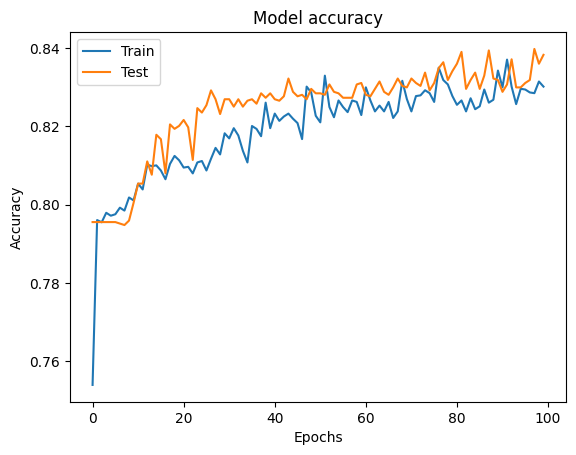

In [48]:
#summarizing the history for accuracy
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

In [49]:
#making predictions
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 [==============================] - 0s 1ms/step


<Axes: >

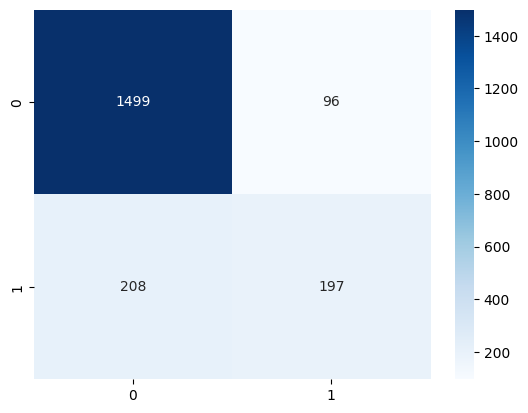

In [50]:
#printing the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="g",cmap="Blues")

In [51]:
#Calculating the accuracy score of the model
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.848